<a href="https://colab.research.google.com/github/NVHarikaVIT/Shree_Cement_Internship/blob/main/Shree_Cement_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project**

---

# Data Analysis of Shree Cement's transportation of goods

**Objective**

The main goal of this project is to analyse the trends followed in dispatching the goods. The dataset with more than 100,000 rows is provided with detailed information about its transportation in all the states of India.

**Datasets**
1. Dispatch file with all information in detail.
2. Target file

1. **ORGANIZATION_ID**: The unique identifier for the organization.
2. **PRODUCT**: The type of cement product.
3. **ORDERED_QTY**: The quantity of the product ordered by the customer.
4. **SHIPPED_QTY**: The quantity of the product that was actually shipped.
5. **TRUCK_TYPE**: The type of truck used for shipping.
6. **PACK_TYPE**: The type of packaging used for the product.
7. **PACK_MAT**: The material used for packaging.
8. **MODE_OF_TRANSPORT**: The mode of transport used for shipping (e.g., road, rail, air, sea).
9. **DISTANCE**: The distance between the shipping point and the delivery point.
10. **FRT_AMT**: The freight amount for the shipment.
11. **PRIMARY_FRT**: The primary freight route used for the shipment.
12. **DI_SO**: The sales order number associated with the dispatch instruction.
13. **TOKEN_NO**: The unique token number assigned to the shipment.
14. **CHUTE_NAME**: The name of the chute from where the cement is loaded onto the truck.
15. **DI_DATE**: The date of the dispatch instruction.
16. **RAKE_POINT**: The point where the cement is loaded onto the rake for rail transport.
17. **UNLOADING_AMT**: The amount charged for unloading the shipment.
18. **CUST_CATEGORY**: The category of the customer (e.g., retailer, wholesaler, direct customer).
19. **CUST_SUB_CATEGORY**: The sub-category of the customer within the main category.
20. **SHIP_CITY**: The city where the shipment is delivered.
21. **SHIP_TALUKA**: The taluka (administrative division in India) where the shipment is delivered.
22. **SHIP_DISTRICT**: The district where the shipment is delivered.
23. **SHIP_STATE**: The state where the shipment is delivered.
24. **BRAND**: The brand of the cement product.
25. **ORDER_NUMBER**: The unique number assigned to the order.
26. **LINE_AMT**: The amount for the line item in the order.
27. **TAX_AMT**: The tax amount for the order.
28. **TOTAL_AMT**: The total amount for the order including tax.
29. **SHIP_PRICE**: The price of the shipment.
30. **ROUTE_ID**: The unique identifier for the shipping route.


**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

**Import datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dispatch_info = pd.read_csv('/content/drive/My Drive/Sample_dispatch_data.csv')
dispatch_info.shape

(141087, 30)

In [ ]:
target =  pd.read_csv('/content/drive/My Drive/Target.csv')
target.columns

Index(['SHIP_DISTRICT', 'TARGET'], dtype='object')

**Data Cleaning**

**1. Detecting and handling Missing data.**

In [ ]:
missing_values = dispatch_info.isnull().sum()
missing_values

ORGANIZATION_ID           0
PRODUCT                   4
ORDERED_QTY               0
SHIPPED_QTY               0
TRUCK_TYPE             1466
PACK_TYPE                 0
PACK_MAT              27356
MODE_OF_TRANSPORT         0
DISTANCE                  0
FRT_AMT                8247
PRIMARY_FRT            8247
DI_SO                     0
TOKEN_NO               1428
CHUTE_NAME              324
DI_DATE                   0
RAKE_POINT                0
UNLOADING_AMT        134770
CUST_CATEGORY             0
CUST_SUB_CATEGORY      2199
SHIP_CITY                 2
SHIP_TALUKA               2
SHIP_DISTRICT             2
SHIP_STATE                2
BRAND                     0
ORDER_NUMBER              0
LINE_AMT                  0
TAX_AMT                   0
TOTAL_AMT                 0
SHIP_PRICE             8247
ROUTE_ID                  0
dtype: int64

**Finding the types of information in all columns**

In [ ]:
def display_uniques(df):
  for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print('-'*50)

display_uniques(dispatch_info)

Column: ORGANIZATION_ID
ORGANIZATION_ID
40     21142
2      16335
5       9472
70      8992
41      8655
3       7736
10      7679
44      7088
12      6623
42      6411
73      6145
4       6015
9       5804
7       5151
45      5006
0       4026
6       3404
301     3369
11      1147
8        608
71       279
Name: count, dtype: int64
--------------------------------------------------
Column: PRODUCT
PRODUCT
PPC                 75425
Clinker             24291
OPC43               18647
PPC PREMIUM          9522
OPC53                5700
CC                   4476
Synthetic Gypsum     1812
AAC                  1068
Rubble                 79
OPC                    63
NaN                     4
Name: count, dtype: int64
--------------------------------------------------
Column: ORDERED_QTY
ORDERED_QTY
50000.00      33025
500000.00      8283
3000000.00     5130
10.00          5101
35.00          4372
              ...  
4.55              1
45.61             1
39.35             1
45.35      

### Data Preprocessing

In [ ]:
dispatch_info.dropna(ignore_index=True, inplace=True)
dispatch_info.shape

(5567, 30)

**Detecting and Handling Outliers**

In [ ]:
def get_outliers(df):
  for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
      quantiles = np.percentile(df[cols], [25,50,75])
      Q1 = quantiles[0]
      Q3 = quantiles[2]
      IQR = Q3- Q1 #inter quantile range
      print(f"Column: {cols} -- Median {quantiles[1]}")
      # limits for outliers
      lower_l = Q1 - 1.5*IQR
      upper_l = Q3 + 1.5*IQR
      #outliers
      outliers = [x for x in df[cols] if (x <lower_l or x>upper_l)]
      print(f"Outliers for {cols}: {outliers}")
      print('-'*50)
      dispatch_info.drop(dispatch_info[dispatch_info[cols] > upper_l].index, inplace=True)
      dispatch_info.drop(dispatch_info[dispatch_info[cols] < lower_l].index, inplace=True)
get_outliers(dispatch_info)

Column: ORGANIZATION_ID -- Median 4.0
Outliers for ORGANIZATION_ID: []
--------------------------------------------------
Column: ORDERED_QTY -- Median 42.0
Outliers for ORDERED_QTY: [168.0, 568.0, 568.0, 200.0, 225.0, 252.0, 252.0, 252.0, 252.0, 252.0, 168.0, 168.0, 168.0, 168.0, 168.0, 180.0, 180.0, 180.0, 180.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 180.0, 180.0, 180.0, 180.0, 168.0, 168.0, 168.0, 180.0, 180.0, 180.0, 180.0, 200.0, 200.0, 200.0, 200.0, 200.0, 252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 180.0, 180.0, 180.0, 180.0, 180.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 264.0, 264.0, 264.

In [ ]:
#After removing outliers
dispatch_info.head()

,ORGANIZATION_ID,PRODUCT,ORDERED_QTY,SHIPPED_QTY,TRUCK_TYPE,PACK_TYPE,PACK_MAT,MODE_OF_TRANSPORT,DISTANCE,FRT_AMT,...,SHIP_TALUKA,SHIP_DISTRICT,SHIP_STATE,BRAND,ORDER_NUMBER,LINE_AMT,TAX_AMT,TOTAL_AMT,SHIP_PRICE,ROUTE_ID
1,6,PPC,76.0,38.0,Trailor-Open Body,Cement Packed,HDPE,Road,50,10336.0,...,JAIPUR,JAIPUR,RAJASTHAN,BANGUR,239598,141217.299482,41568.887586,182786.187068,272.0,P06666
4,2,OPC43,84.0,42.0,Trailor-Open Body,Cement Packed,HDPE,Road,597,59850.0,...,KURUKSHETRA,KURUKSHETRA,HARYANA,ROCKSTRONG,259353,205284.473274,58623.263162,263907.736436,1425.0,P03198
5,2,OPC43,84.0,42.0,Trailor-Open Body,Cement Packed,HDPE,Road,597,59850.0,...,KURUKSHETRA,KURUKSHETRA,HARYANA,ROCKSTRONG,259353,215268.384327,58138.947318,273407.331645,1425.0,P03198
6,2,OPC43,42.0,42.0,Trailor-Open Body,Cement Packed,HDPE,Road,600,60480.0,...,KURUKSHETRA,KURUKSHETRA,HARYANA,SHREE,259882,226762.075743,63423.168090,290185.243833,1440.0,P03199
13,2,OPC43,84.0,42.0,Trailor-Open Body,Cement Packed,HDPE,Road,647,65142.0,...,SAHA,AMBALA,HARYANA,SHREE,262622,216148.514542,60084.356104,276232.870646,1551.0,P03329


In [ ]:
dispatch_info.shape

(3040, 30)

**Interpretation:** After removing missing data and outliers, the dataset is reduced to 3040
 rows.

**Exploratory Data Analysis**

1. Most frequently used routes for shipping.

In [ ]:
dispatch_info['ROUTE_ID'].value_counts()

ROUTE_ID
P06666    140
P36895     83
P03223     59
P03298     48
P03149     48
         ... 
P05696      1
P03120      1
P05830      1
P19225      1
P19835      1
Name: count, Length: 670, dtype: int64

2. Average amount spent for the order state-wise.

In [ ]:
dis_states = dispatch_info[['SHIP_STATE', 'TOTAL_AMT']]
dis_states_grp = dis_states.groupby(['SHIP_STATE'], as_index=False).mean()
dis_states_grp

,SHIP_STATE,TOTAL_AMT
0,GUJARAT,263095.873025
1,HARYANA,264402.668378
2,PUNJAB,286625.417944
3,RAJASTHAN,203218.723540
4,UTTAR PRADESH,288229.693440
5,UTTARAKHAND,306248.998458


Visualization for the above code

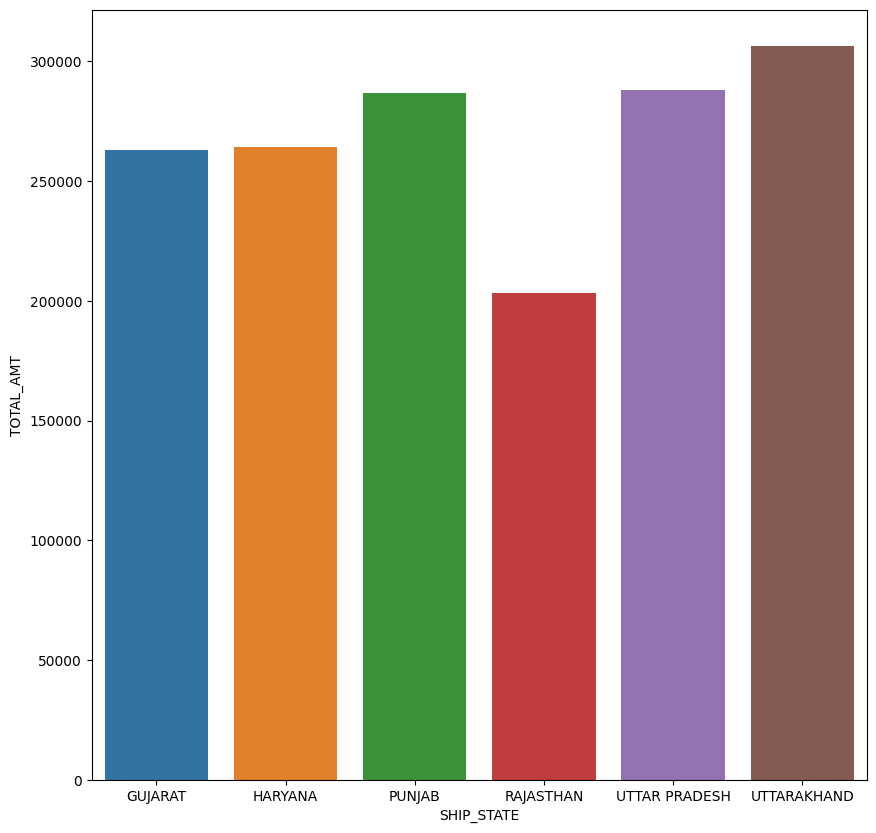

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='SHIP_STATE', y='TOTAL_AMT', data=dis_states_grp, hue='SHIP_STATE', legend='auto')
plt.show()

3. Brands that are mostly shipped.

In [ ]:
dispatch_info['BRAND'].value_counts()

BRAND
SHREE         1648
ROCKSTRONG     959
BANGUR         433
Name: count, dtype: int64

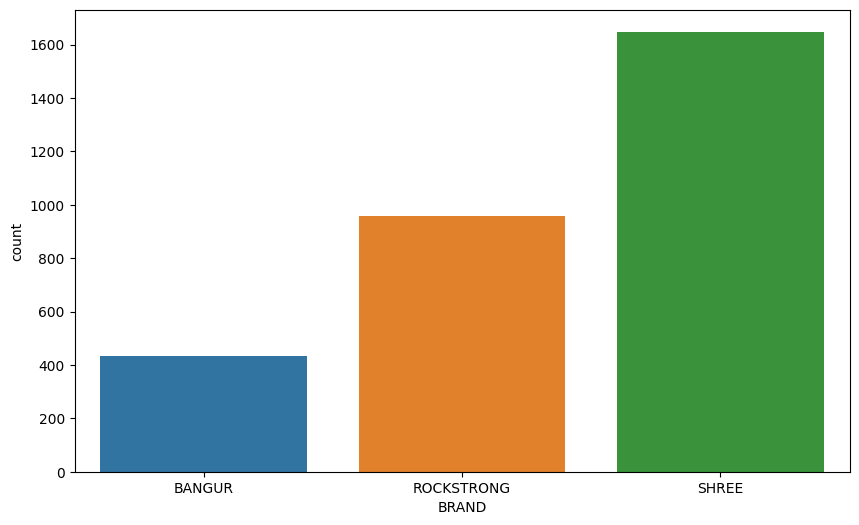

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='BRAND', data=dispatch_info, hue='BRAND')
plt.show()

4. Proportion of delayed shipments to total shipments.

In [ ]:
dispatch_info['DELAYED'] = dispatch_info['ORDERED_QTY'] - dispatch_info['SHIPPED_QTY']
print(dispatch_info['DELAYED'].sum(axis=0) / dispatch_info['ORDERED_QTY'].sum(axis=0))

0.270754153348088


**Interpretation:** It is clear that 27% of ordered shipments are delayed.

4. Types of customers vs products they ordered

In [ ]:
cust_prod = dispatch_info[['CUST_SUB_CATEGORY', 'PRODUCT']]
cust_prod_grp = cust_prod.groupby(['CUST_SUB_CATEGORY'], as_index=False).count()
cust_prod_grp

,CUST_SUB_CATEGORY,PRODUCT
0,Builder & Developers,444
1,Consignee (Ship to),1924
2,Contractors,20
3,Dlr-Wholesale based,1
4,Government,4
5,Industrial Buyers,128
6,Institutional Buyers,510
7,Obligatory Non Trade,9


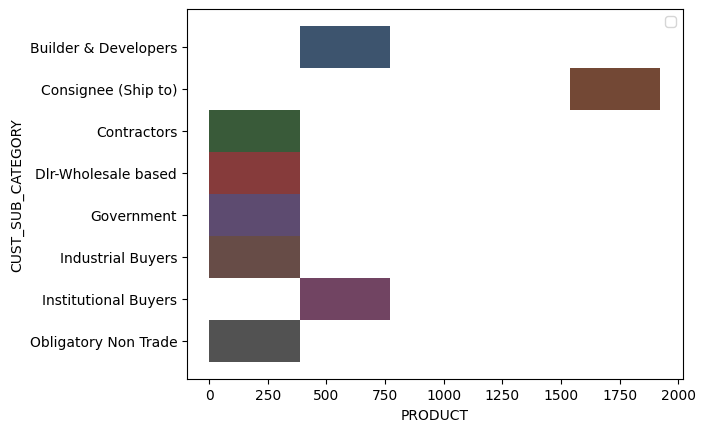

In [ ]:
sns.histplot(x='PRODUCT',y='CUST_SUB_CATEGORY',data=cust_prod_grp, hue='CUST_SUB_CATEGORY')
plt.legend(cust_prod_grp[['CUST_SUB_CATEGORY']],loc='best')
plt.show()

**3. Operational Efficiency**

1. Can we identify the products that are frequently involved in delayed shipments?

In [ ]:
delayed_products = dispatch_info[['PRODUCT','DELAYED', 'SHIPPED_QTY']]
delayed_products_grp = delayed_products.groupby(['PRODUCT'], as_index=False).sum()
delayed_products_grp

#dispatch_info['PRODUCT'].value_counts()

,PRODUCT,DELAYED,SHIPPED_QTY
0,OPC43,36444.159,93291.341
1,OPC53,2329.500,8634.500
2,PPC,7818.000,23563.550


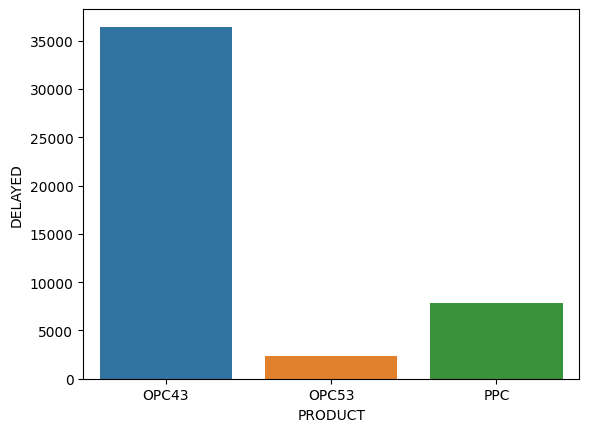

In [ ]:
sns.barplot(x='PRODUCT', y='DELAYED', data=delayed_products_grp, hue='PRODUCT')
plt.show()

3. Common characteristics for delayed shipments

In [ ]:
dispatch = dispatch_info.copy()

In [ ]:
from sklearn import preprocessing
label_en = preprocessing.LabelEncoder()

objects = ['PRODUCT','TRUCK_TYPE', 'PACK_TYPE', 'PACK_MAT', 'MODE_OF_TRANSPORT', 'DI_SO', 'DI_DATE', 'RAKE_POINT', 'CHUTE_NAME', 'CUST_CATEGORY', 'CUST_SUB_CATEGORY', 'SHIP_CITY', 'SHIP_TALUKA', 'SHIP_DISTRICT', 'SHIP_STATE', 'BRAND', 'ROUTE_ID']

for col in objects:
  dispatch[col] = label_en.fit_transform(dispatch[col])

corr_mat = dispatch.corr(method = 'pearson')
corr_mat['DELAYED'].sort_values(ascending=False)

DELAYED              1.000000
ORDERED_QTY          0.991947
FRT_AMT              0.086560
PRIMARY_FRT          0.083253
SHIP_PRICE           0.083253
SHIP_CITY            0.076522
DISTANCE             0.069125
SHIPPED_QTY          0.050976
TAX_AMT              0.044196
TOTAL_AMT            0.041984
LINE_AMT             0.041090
BRAND                0.026334
ROUTE_ID             0.022073
SHIP_STATE           0.003724
DI_DATE             -0.000442
SHIP_TALUKA         -0.001908
ORDER_NUMBER        -0.007324
CHUTE_NAME          -0.014339
TRUCK_TYPE          -0.020677
CUST_SUB_CATEGORY   -0.027501
SHIP_DISTRICT       -0.037463
PRODUCT             -0.055865
ORGANIZATION_ID     -0.061681
RAKE_POINT          -0.065042
TOKEN_NO            -0.080056
PACK_TYPE                 NaN
PACK_MAT                  NaN
MODE_OF_TRANSPORT         NaN
DI_SO                     NaN
UNLOADING_AMT             NaN
CUST_CATEGORY             NaN
Name: DELAYED, dtype: float64

From this, it is clear that ordered quantity is highly correlated to delayed shipments. Also the factors like freight amnount, ship price, distance and shipped quantities have less effect on the shipment delay.

**Predictive Modelling**

In [ ]:
shipped_qty = disp_info1[['SHIP_DISTRICT','SHIPPED_QTY']]
shipped_qty_grp = shipped_qty.groupby(['SHIP_DISTRICT'], as_index=False).sum()
shipped_qty_grp

,SHIP_DISTRICT,SHIPPED_QTY
0,ADILABAD,95.00
1,AGAR,1426.50
2,AGRA,35167.12
3,AHMEDABAD,9339.82
4,AHMEDNAGAR,15195.26
...,...,...
429,WEST SINGHBHUM,6961.52
430,YADADRI BHUVANAGIRI,190.00
431,YADGIR,890.50
432,YAMUNA NAGAR,22855.86


In [ ]:
target

,SHIP_DISTRICT,TARGET
0,ADILABAD,95.0
1,AGAR,1505.0
2,AGRA,33698.0
3,AHMEDABAD,10229.0
4,AHMEDNAGAR,14845.0
...,...,...
429,WEST SINGHBHUM,7369.0
430,YADADRI BHUVANAGIRI,208.0
431,YADGIR,831.0
432,YAMUNA NAGAR,21919.0


**Deviations from target values**

In [ ]:
devs = shipped_qty_grp['SHIPPED_QTY'] - target['TARGET']
# More than target
not_improved = target.loc[devs < 0]
not_improved.head()
print('No. of not improved districts: ', not_improved.shape[0])
# Falling behind target
improved = target.loc[devs > 0]
improved.head()
print('No. of improved districts: ', improved.shape[0])

No. of not improved districts:  217
No. of improved districts:  211


In [ ]:
## Defining the predictors
corr_mat['SHIPPED_QTY'].sort_values(ascending=False)

X = dispatch_info[['TOTAL_AMT', 'DISTANCE', 'FRT_AMT', 'SHIP_PRICE']]
Y = dispatch_info['SHIPPED_QTY']

# Machine Learning model

**Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, Y_train)

result = lm.predict(X_test)
result[0:5]

array([41.5951794 , 38.79524343, 43.52932333, 42.30776817, 41.82122379])

In [ ]:
print(f'R2 score: {r2_score(Y_test, result)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test, result)}')

R2 score: 0.7311270991386254
Mean Absolute Percentage Error: 0.027019304315359354
